In [3]:
from pyquil import Program, get_qc
from pyquil.gates import H, CNOT, MEASURE
from functools import reduce
import numpy as np

shots = 1024

p = Program()

ro = p.declare('ro', memory_type='BIT', memory_size=2)

p.inst(H(0))
p.inst(CNOT(0, 1))
p.inst(MEASURE(0, ro[0]))
p.inst(MEASURE(1, ro[1]))

p.wrap_in_numshots_loop(shots)

qc = get_qc('2q-qvm')
results_list = qc.run(p)
results = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1], ""), results_list))
counts = dict(zip(results,[results.count(i) for i in results]))
print(counts)

{'00': 498, '11': 526}


In [41]:
#!pip uninstall -y pyquil

In [42]:
#!pip install pyquil==2.12

In [6]:
import os


In [7]:
QCONVERT = "../node_converter/qconvert-js/cli.js"

In [32]:
PLATFORM = "cirq"

In [33]:
def convert(source_folder, dest_folder, dest_format="pyquil"):
    files = os.listdir(source_folder)
    qasm_files = [f for f in files if f.endswith(".qasm")]
    print(qasm_files)
    for filename in qasm_files:
        src_filepath = os.path.join(source_folder, filename)
        dest_filepath = os.path.join(dest_folder, filename.replace(".qasm", "_" + dest_format) + ".py")
        string_to_execute = f"{QCONVERT} -h -s qasm -d {dest_format} -i {src_filepath} -o {dest_filepath}"
        print(string_to_execute)
        os.system(string_to_execute)

convert(source_folder="../data/experiment_v03/cross_platform/original_programs", 
        dest_folder="../data/experiment_v03/cross_platform/programs/" + PLATFORM, 
        dest_format=PLATFORM)

['2.qasm', '0.qasm', '1.qasm']
../node_converter/qconvert-js/cli.js -h -s qasm -d cirq -i ../data/experiment_v03/cross_platform/original_programs/2.qasm -o ../data/experiment_v03/cross_platform/programs/cirq/2_cirq.py
Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

../node_converter/qconvert-js/cli.js -h -s qasm -d cirq -i ../data/experiment_v03/cross_platform/original_programs/0.qasm

In [34]:

import subprocess
import sys
import json

print(os.getcwd())

def run_programs(source_folder, dest_folder, python_path = "/home/paltenmo/.conda/envs/ML4Quantum/bin/python3"):
    files = os.listdir(source_folder)
    py_files = [f for f in files if f.endswith(".py")]
    print(py_files)
    for filename in py_files:
        prefix = filename.replace(".py", "")
        print(f"Executing: {filename}")
        with open(os.path.join(dest_folder, prefix + ".json"), 'w') as output_file:
            script_to_execute = os.path.join(source_folder, filename)
            proc = subprocess.Popen(
                [python_path, script_to_execute], 
                stdout=subprocess.PIPE)
            output = str(proc.stdout.read().decode('unicode_escape'))
            output = output.replace("'", '"')
            print(output)
            res = json.loads(output)
            print(res)
            json.dump(res, output_file)
            
run_programs(source_folder="../data/experiment_v03/cross_platform/programs/" + PLATFORM, 
             dest_folder="../data/experiment_v03/cross_platform/executions/" + PLATFORM)            

/home/paltenmo/projects/ML4Quantum/notebooks
['0_cirq.py', '1_cirq.py', '2_cirq.py']
Executing: 0_cirq.py
{"01011": 7, "00001": 344, "11001": 135, "01001": 18, "10011": 2, "10010": 20, "01110": 11, "11100": 68, "01010": 43, "00100": 182, "10000": 3, "01100": 24, "10111": 9, "11110": 9, "11011": 11, "00110": 9, "00011": 5, "10100": 17, "01111": 25, "11000": 2, "00101": 30, "10001": 11, "01101": 1, "10110": 11, "00000": 12, "01000": 3, "11101": 6, "00111": 1, "11111": 2, "10101": 1, "11010": 1, "00010": 1}

{'01011': 7, '00001': 344, '11001': 135, '01001': 18, '10011': 2, '10010': 20, '01110': 11, '11100': 68, '01010': 43, '00100': 182, '10000': 3, '01100': 24, '10111': 9, '11110': 9, '11011': 11, '00110': 9, '00011': 5, '10100': 17, '01111': 25, '11000': 2, '00101': 30, '10001': 11, '01101': 1, '10110': 11, '00000': 12, '01000': 3, '11101': 6, '00111': 1, '11111': 2, '10101': 1, '11010': 1, '00010': 1}
Executing: 1_cirq.py
{"1111101000": 5, "1011101010": 5, "1011111101": 16, "0100000010

{"111010100": 1, "000000001": 20, "000001000": 19, "101001011": 30, "111011000": 4, "111001000": 5, "110000011": 14, "010011011": 4, "100000010": 15, "101010010": 5, "110000001": 23, "110000010": 12, "010001000": 3, "001000001": 12, "100111000": 4, "001001010": 26, "001000000": 3, "011001001": 23, "110100011": 4, "101001001": 25, "101001000": 17, "001010011": 8, "011001110": 2, "101000010": 16, "100110000": 2, "011001011": 16, "001001001": 3, "011000010": 18, "110100111": 2, "000001010": 34, "100001011": 19, "100100000": 2, "100011100": 2, "110100100": 1, "010000000": 12, "111000011": 9, "110001010": 18, "101111011": 2, "100010010": 6, "110001011": 11, "110000000": 10, "011000011": 5, "011011011": 1, "010001001": 13, "010111011": 4, "011001010": 14, "000000010": 9, "011001000": 9, "110011111": 2, "010000010": 11, "100011110": 2, "010110011": 3, "011000001": 13, "000010011": 3, "001011110": 2, "000011111": 4, "011011110": 2, "011000000": 27, "111111011": 1, "101000001": 5, "111110011": 

In [36]:
d = [[1,2,3,4], [2,3,4], [3,4,5,6,7]]
list(set.intersection(*map(set,d)))

[3, 4]

# Inspect Results

In [39]:
import sys
sys.path.append("../lib")
from utils import iterate_over

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
RESULT_PATH = "../data/experiment_v03/cross_platform/predictions"
records = list(zip(*iterate_over(RESULT_PATH, filetype=".json", parse_json=True)))[1]
df_exec = pd.DataFrame.from_records(records)
df_exec.head()

,test,test_long_name,comparison_name,circuit_id,random_seed,statistic_cirq_qiskit,p_value_cirq_qiskit,statistic_pyquil_qiskit,p_value_pyquil_qiskit,statistic_cirq_pyquil,p_value_cirq_pyquil
0,ks,Kolmogorov–Smirnov Test,cross_platform,56,None,0.079102,0.003287,0.042969,0.301025,0.038086,0.447773
1,ks,Kolmogorov–Smirnov Test,cross_platform,79,None,0.041992,0.327394,0.026367,0.868965,0.057617,0.066768
2,ks,Kolmogorov–Smirnov Test,cross_platform,8,None,0.023438,0.941358,0.028320,0.806349,0.032227,0.662484
3,ks,Kolmogorov–Smirnov Test,cross_platform,69,None,0.076172,0.005242,0.050781,0.142604,0.031250,0.699635
4,ks,Kolmogorov–Smirnov Test,cross_platform,19,None,0.022461,0.958583,0.043945,0.276181,0.049805,0.157680


In [54]:
matrix = df_exec[["p_value_cirq_qiskit", "p_value_pyquil_qiskit", "p_value_cirq_pyquil"]].to_numpy()
binary_matrix = np.where(matrix < .05, 1, 0)

<AxesSubplot:>

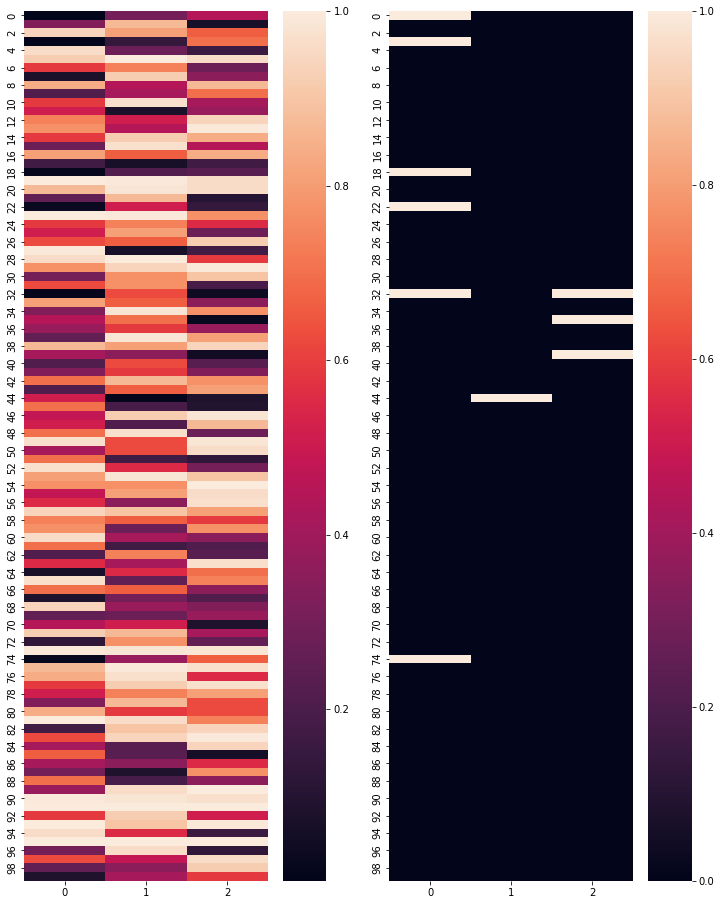

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12,16))
sns.heatmap(
    data=matrix,
    ax=axes[0]
)
sns.heatmap(
    data=binary_matrix,
    ax=axes[1]
)

# Check alert as function of n_qubits

In [56]:
INFO_PATH = "../data/experiment_v03/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,6,160,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,56,cross_platform
1,12,155,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,79,cross_platform
2,18,184,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,8,cross_platform
3,7,146,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,69,cross_platform
4,14,54,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,19,cross_platform


In [59]:
df_all = pd.merge(df_info, df_exec.rename(columns={"comparison_name": "benchmark_name"}), on=["circuit_id", "benchmark_name"])

In [61]:
df_all["min_p_value"] = df_all.apply(
    lambda row: min([row["p_value_cirq_qiskit"], row["p_value_cirq_pyquil"], row["p_value_pyquil_qiskit"]]),
    axis=1
)

<AxesSubplot:xlabel='n_qubits', ylabel='min_p_value'>

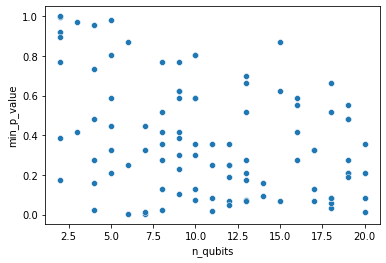

In [63]:
sns.scatterplot(
    data=df_all,
    x="n_qubits",
    y="min_p_value",
)

In [66]:
# get most critical p_values
df_top = df_all.sort_values(by="min_p_value").head(10)
df_top[["circuit_id", "n_qubits", "n_ops", "min_p_value"]]

,circuit_id,n_qubits,n_ops,min_p_value
0,56,6,160,0.003287
3,69,7,146,0.005242
32,37,7,166,0.012638
44,54,20,132,0.014534
18,93,11,132,0.016682
74,17,8,116,0.024931
35,24,4,171,0.024931
22,71,18,75,0.032271
39,42,12,44,0.046830
85,90,18,185,0.059439


# Experiment with Qconvert Circuit

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append("../lib")
from simulators import QconvertCircuit

In [25]:
N_SHOTS = 1024

In [26]:
QASM_FILE_PATH = "../data/experiment_v03/cross_platform/original_programs/56.qasm"
with open(QASM_FILE_PATH, 'r') as in_file:
    qasm_content = in_file.read()
print(qasm_content)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
creg c[6];
cx q[5], q[3];
ry(0.9801424781769557) q[0];
cx q[5], q[3];
ry(6.094123332392967) q[0];
rz(1.1424399624340646) q[1];
cx q[1], q[3];
rx(3.844385118274953) q[1];
cx q[1], q[2];
rx(1.2545873742863833) q[4];
rx(0.29185655071471744) q[3];
ry(0.4087312132537349) q[1];
U(0,5.0793103400482895,0) q[5];
cx q[0], q[4];
rx(3.1112882860657196) q[0];
cx q[5], q[1];
ry(3.267683749398383) q[1];
rx(6.092079887237463) q[1];
rz(5.622366060669442) q[5];
ry(0.55601478868818) q[5];
cx q[0], q[2];
cx q[1], q[5];
cx q[1], q[3];
cx q[4], q[0];
U(0,1.24856745052169,0) q[4];
cx q[4], q[3];
rz(0.465236267850866) q[4];
cx q[0], q[5];
ry(0.39934889266571716) q[1];
cx q[1], q[4];
ry(2.9670138796084675) q[5];
cx q[4], q[3];
rx(3.1026092358267214) q[4];
rx(0.15971308367983456) q[2];
cx q[0], q[4];
cx q[3], q[5];
cx q[2], q[4];
cx q[0], q[2];
cx q[5], q[4];
ry(5.0496205853630185) q[5];
cx q[5], q[2];
rz(1.9980747615752663) q[5];
cx q[1], q[3];
rz(0.04368152440717

## Run Qiskit

In [27]:
executor_qiskit = QconvertCircuit(target_platform="qiskit", repetitions=N_SHOTS)
executor_qiskit.from_qasm(qasm_string=qasm_content)

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

Error: output file "./qconvert_tmp_cache/1002df2598b0e8e4e0e90ea160a2ad9197cd70cbe22c8595d58efc2d.py" already exists.
Use -w switch to overwrite.


In [28]:
executor_qiskit.execute()
result_qiskit = executor_qiskit.get_result()
result_qiskit

{'010101': 1,
 '001011': 3,
 '110100': 5,
 '111010': 2,
 '001000': 2,
 '010010': 6,
 '011111': 7,
 '001100': 3,
 '010000': 12,
 '101110': 13,
 '100110': 9,
 '111001': 13,
 '001101': 4,
 '111101': 5,
 '011001': 14,
 '111000': 39,
 '000110': 27,
 '110101': 44,
 '111100': 1,
 '110011': 73,
 '111111': 21,
 '100010': 38,
 '110010': 2,
 '010110': 14,
 '000000': 20,
 '101011': 52,
 '100100': 17,
 '000001': 26,
 '101100': 10,
 '000010': 23,
 '001010': 9,
 '000100': 18,
 '010001': 15,
 '101001': 31,
 '100111': 14,
 '001110': 6,
 '101000': 10,
 '010111': 1,
 '100011': 41,
 '110110': 13,
 '011011': 8,
 '000111': 8,
 '110111': 17,
 '001001': 13,
 '000011': 10,
 '100101': 5,
 '100001': 17,
 '000101': 18,
 '010011': 33,
 '011110': 45,
 '110001': 88,
 '011100': 11,
 '101101': 10,
 '110000': 15,
 '010100': 7,
 '011000': 23,
 '011101': 6,
 '100000': 2,
 '011010': 7,
 '101010': 4,
 '111110': 4,
 '101111': 9}

## Run Cirq

In [29]:
executor_cirq = QconvertCircuit(target_platform="cirq", repetitions=N_SHOTS)
executor_cirq.from_qasm(qasm_string=qasm_content)

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

Error: output file "./qconvert_tmp_cache/6ef161da5ca5ce9745bd9a28873ce9df9f56620daf18f65b68a2ee6d.py" already exists.
Use -w switch to overwrite.


In [36]:
executor_cirq.execute()
result_cirq = executor_cirq.get_result()

## Run Detector

In [37]:
from detectors import KS_Detector

In [38]:
detector = KS_Detector()
stat, p_value = detector.check(result_A=result_qiskit, result_B=result_cirq)
stat, p_value

(0.017578125, 0.9974384059634622)

# Check if Qconvert (8192 shots) has lower p-value for many qubits

In [44]:
RESULT_PATH = "../data/experiment_v04/cross_platform/predictions/ks"
records = list(zip(*iterate_over(RESULT_PATH, filetype=".json", parse_json=True)))[1]
df_exec = pd.DataFrame.from_records(records)
df_exec.head()

,test,test_long_name,comparison_name,circuit_id,random_seed,statistic_cirq_qiskit,p_value_cirq_qiskit
0,ks,Kolmogorov–Smirnov Test,cross_platform,715,None,0.018311,0.128261
1,ks,Kolmogorov–Smirnov Test,cross_platform,115,None,0.009644,0.840771
2,ks,Kolmogorov–Smirnov Test,cross_platform,101,None,0.013428,0.451212
3,ks,Kolmogorov–Smirnov Test,cross_platform,516,None,0.008301,0.940407
4,ks,Kolmogorov–Smirnov Test,cross_platform,652,None,0.015381,0.287140


In [45]:
INFO_PATH = "../data/experiment_v04/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,18,85,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,715,cross_platform
1,15,135,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,115,cross_platform
2,9,31,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,101,cross_platform
3,20,128,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,516,cross_platform
4,5,46,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,652,cross_platform


In [46]:
df_all = pd.merge(df_info, df_exec.rename(columns={"comparison_name": "benchmark_name"}), on=["circuit_id", "benchmark_name"])

<AxesSubplot:xlabel='n_qubits', ylabel='p_value_cirq_qiskit'>

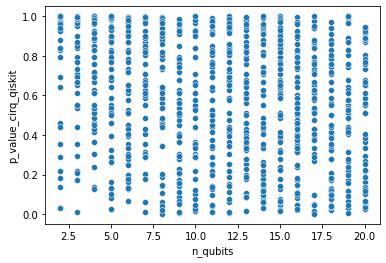

In [47]:
sns.scatterplot(
    data=df_all, 
    y="p_value_cirq_qiskit",
    x="n_qubits"
)

In [49]:
df_critical = df_all.sort_values(by="p_value_cirq_qiskit")
df_critical.head(10)

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name,test,test_long_name,random_seed,statistic_cirq_qiskit,p_value_cirq_qiskit
9,8,162,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,480,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.032715,0.000311
642,17,84,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,368,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.028809,0.002229
906,19,45,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,688,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.027710,0.003707
329,9,66,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,888,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.027588,0.003918
53,12,199,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,935,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.027466,0.004140
945,12,53,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,255,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.025879,0.008284
517,3,188,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,153,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.025879,0.008284
395,7,97,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,649,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.025757,0.008723
38,11,186,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,172,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.025635,0.009183
379,9,185,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,576,cross_platform,ks,Kolmogorov–Smirnov Test,None,0.025391,0.010170


## Loop over the most divergent

In [60]:
MAIN_FOLDER = "../data/experiment_v04/cross_platform/original_programs/"


In [78]:
def read_qasm(path):
    with open(path, 'r') as in_file:
        qasm_content = in_file.read()
    return qasm_content

def loop_over(qasm_file_path, platform_a='qiskit', platform_b='cirq', shots=1024, n_repetitions=3):
    records = []
    qasm_content = read_qasm(path=qasm_file_path)
    
    # initilize the executors
    executor_a = QconvertCircuit(target_platform=platform_a, repetitions=shots)
    executor_a.from_qasm(qasm_string=qasm_content)
    
    executor_b = QconvertCircuit(target_platform=platform_b, repetitions=shots)
    executor_b.from_qasm(qasm_string=qasm_content)
    
    for i in range(n_repetitions):
        # run one executor
        executor_a.execute()
        res_a = executor_a.get_result()

        executor_b.execute()
        res_b = executor_b.get_result()
    
        detector = KS_Detector()
        stat, p_value = detector.check(result_A=res_a, result_B=res_b)
        
        new_record = {
            "iteration": str(i),
            "statistic": stat,
            "p_value": p_value,
            "platform_a": platform_a,
            "platform_b": platform_b,
            "shots": str(shots),
            "qasm_file_path": qasm_file_path ,
            "qasm_filename": qasm_file_path.split("/")[-1]         
        }
        
        records.append(new_record)
    return records
    

In [79]:
def get_top_k_program(df, k, p_value_col="p_value_cirq_qiskit"):
    df = df.sort_values(by=p_value_col)
    df = df[["circuit_id", p_value_col]]
    top_programs = np.array(df["circuit_id"])[:k]
    return list(top_programs)

get_top_k_program(df_all, k=10)

['480', '368', '688', '888', '935', '255', '153', '649', '172', '576']

In [80]:
import os

all_records = []
REPETITIONS = 2
TOP_K = 10
SHOTS = 8192

for circuit_id in get_top_k_program(df_all, k=TOP_K):
    qasm_file_path = os.path.join(MAIN_FOLDER, circuit_id + ".qasm")
    new_records = loop_over(
        qasm_file_path, 
        platform_a='qiskit', 
        platform_b='cirq', 
        shots=SHOTS, 
        n_repetitions=REPETITIONS)
    all_records.extend(new_records)

df_repetition = pd.DataFrame.from_records(all_records)

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj, quil, pyquil, braket, cirq, tfq, qsharp, quest, js, quantum-circuit, toaster, svg, svg-inline
        -j, --jupyter	Output jupyter notebook (for qiskit, pyquil, braket, cirq, tfq, qsharp, and js only)
        -w, --overwrite	Overwrite output file if it already exists
        -h, --help	Print this help text

Enjoy! :)

Q-Convert - Quantum Language Converter

Usage:
    q-convert -i input_file -s source_format -o output_file -d destination_format [-j] [-w]
        -i, --input	Input file
        -s, --source	Source format: qasm, quil, qobj, quantum-circuit, toaster
        -o, --output	Output file
        -d, --dest	Destination format: qiskit, qasm, qobj

In [82]:
df_repetition.head(20)

,iteration,statistic,p_value,platform_a,platform_b,shots,qasm_file_path,qasm_filename
0,0,0.049805,0.157680,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,480.qasm
1,1,0.041992,0.327394,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,480.qasm
2,0,0.024414,0.920560,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,368.qasm
3,1,0.039062,0.415529,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,368.qasm
4,0,0.067383,0.019110,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,688.qasm
5,1,0.032227,0.662484,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,688.qasm
6,0,0.042969,0.301025,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,888.qasm
7,1,0.045898,0.231004,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,888.qasm
8,0,0.044922,0.252849,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,935.qasm
9,1,0.062500,0.036607,qiskit,cirq,8192,../data/experiment_v04/cross_platform/original...,935.qasm


In [84]:
df_repetition.groupby(by="qasm_filename")["p_value"].min()

qasm_filename
153.qasm    0.355285
172.qasm    0.838823
255.qasm    0.868965
368.qasm    0.415529
480.qasm    0.157680
576.qasm    0.772013
649.qasm    0.838823
688.qasm    0.019110
888.qasm    0.231004
935.qasm    0.036607
Name: p_value, dtype: float64